In [66]:
# Dependencies ans Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create new empty list to hold the data
cities_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [4]:
# Performing API calls

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do below things...
for index, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        cities_name_list .append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter < 50:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 0 of Set 2 : hithadhoo
Processing Record 0 of Set 3 : barrow
Processing Record 0 of Set 4 : rosarito
Processing Record 0 of Set 5 : champagnole
Processing Record 0 of Set 6 : cabo san lucas
Processing Record 0 of Set 7 : mataura
Processing Record 0 of Set 8 : chokurdakh
Processing Record 0 of Set 9 : bako
Processing Record 0 of Set 10 : cidreira
Processing Record 0 of Set 11 : kaitangata
Processing Record 0 of Set 12 : ventspils
Processing Record 0 of Set 13 : sioux lookout
Processing Record 0 of Set 14 : kogon
Processing Record 0 of Set 15 : port lincoln
Processing Record 0 of Set 16 : punta arenas
Processing Record 0 of Set 17 : chuy
Processing Record 0 of Set 18 : carnarvon
Processing Record 0 of Set 19 : yarmouth
Processing Record 0 of Set 20 : asau
Processing Record 0 of Set 21 : marystown
Processing Record 0 of Set 22 : saint joseph
Processing Record 0 of Set 23 : san patricio
Processing Record 0 of Set 24 

Processing Record 0 of Set 184 : kimbe
City not found. Skipping...
Processing Record 0 of Set 185 : palu
Processing Record 0 of Set 186 : kulhudhuffushi
Processing Record 0 of Set 187 : lakes entrance
Processing Record 0 of Set 188 : aklavik
Processing Record 0 of Set 189 : acari
Processing Record 0 of Set 190 : buraydah
Processing Record 0 of Set 191 : ojo caliente
Processing Record 0 of Set 192 : cerrito
Processing Record 0 of Set 193 : gorin
Processing Record 0 of Set 194 : the valley
City not found. Skipping...
Processing Record 0 of Set 195 : panguna
Processing Record 0 of Set 196 : krasnoselkup
Processing Record 0 of Set 197 : maragheh
Processing Record 0 of Set 198 : sibolga
Processing Record 0 of Set 199 : nantucket
Processing Record 0 of Set 200 : turayf
Processing Record 0 of Set 201 : nichinan
Processing Record 0 of Set 202 : barguzin
Processing Record 0 of Set 203 : port macquarie
Processing Record 0 of Set 204 : husavik
Processing Record 0 of Set 205 : skegness
Processing 

Processing Record 0 of Set 363 : touros
Processing Record 0 of Set 364 : ha giang
Processing Record 0 of Set 365 : quatre cocos
Processing Record 0 of Set 366 : port said
City not found. Skipping...
Processing Record 0 of Set 367 : brae
Processing Record 0 of Set 368 : impfondo
Processing Record 0 of Set 369 : rocha
Processing Record 0 of Set 370 : katsuura
Processing Record 0 of Set 371 : sambava
Processing Record 0 of Set 372 : skjervoy
Processing Record 0 of Set 373 : kuna
Processing Record 0 of Set 374 : barra da estiva
Processing Record 0 of Set 375 : west freehold
Processing Record 0 of Set 376 : komsomolskiy
Processing Record 0 of Set 377 : esmeraldas
Processing Record 0 of Set 378 : puerto el triunfo
Processing Record 0 of Set 379 : garmsar
Processing Record 0 of Set 380 : takestan
City not found. Skipping...
Processing Record 0 of Set 381 : mwene-ditu
Processing Record 0 of Set 382 : miyako
Processing Record 0 of Set 383 : mhlambanyatsi
Processing Record 0 of Set 384 : sindou


Processing Record 0 of Set 546 : floriano
Processing Record 0 of Set 547 : teahupoo
Processing Record 0 of Set 548 : praya
Processing Record 0 of Set 549 : phenix city
Processing Record 0 of Set 550 : provost
Processing Record 0 of Set 551 : denain
Processing Record 0 of Set 552 : lata
Processing Record 0 of Set 553 : fot
Processing Record 0 of Set 554 : melenki
Processing Record 0 of Set 555 : kara
Processing Record 0 of Set 556 : chakulia
Processing Record 0 of Set 557 : korablino
Processing Record 0 of Set 558 : aleksandrovsk-sakhalinskiy
Processing Record 0 of Set 559 : bontang
City not found. Skipping...
Processing Record 0 of Set 560 : sabya
Processing Record 0 of Set 561 : murgab
-----------------------------
Data Retrieval Complete
-----------------------------


In [106]:
# Create a dictionary with the data retrieved
weather_data_dict = { 
                "City" : cities_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
}

# Convert raw data to dataFrame
weather_df = pd.DataFrame.from_dict(weather_data_dict, orient='index')

# Transpose rows and columns
weather_df = weather_df.transpose()

# Download retrieved data into a csv file named cities_output
weather_df.to_csv("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/cities_output.csv", index=False,header=True, encoding='utf-8')

# Reload the output data set to perform some analysis 
weather_df = pd.read_csv("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/cities_output.csv") 

In [108]:
# Determine the number of rows and columns of the weather_df datasate 
# weather_df.shape
weather_df.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [109]:
# Describing weather_df's variables 
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,560.000000,5.600000e+02,560.000000,560.000000,560.000000,560.000000,560.000000
mean,59.089286,1.623332e+09,66.500000,20.915478,18.278173,70.514107,8.320286
std,39.612965,7.523896e+01,23.771723,32.700871,89.668296,17.335369,5.593121
min,0.000000,1.623331e+09,3.000000,-54.800000,-175.200000,28.420000,0.000000
25%,20.000000,1.623332e+09,52.000000,-6.180275,-59.693150,59.085000,4.085000
50%,75.000000,1.623332e+09,73.000000,22.933300,19.229450,73.815000,6.910000
75%,99.250000,1.623332e+09,84.250000,48.015400,97.718200,80.945000,11.500000
max,100.000000,1.623332e+09,100.000000,78.218600,179.316700,117.390000,37.980000


# First requirement

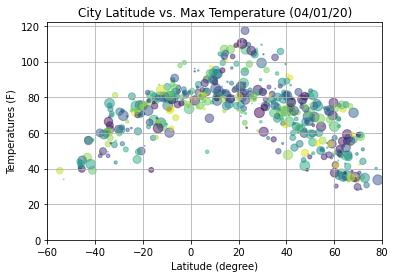

The highest temperatures are observed at latitudes between 0 and 40 degrees, with a culminant point at 20 degrees.


In [111]:
# Latitude vs. Temperature Plot

N = 560
x = weather_df["Lat"]
y = weather_df["Max Temp"]
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2  
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid()
plt.xlabel("Latitude (degree)")
plt.ylabel("Temperatures (F)")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlim(-60,80)
plt.ylim(0,122)
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeTemperature.png")
plt.show()
print("The highest temperatures are observed at latitudes between 0 and 40 degrees, with a culminant point at 20 degrees.")

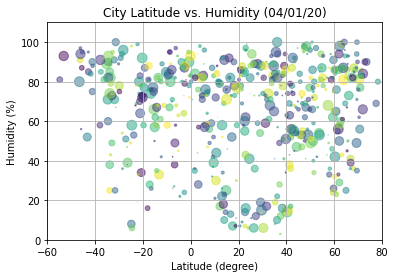

The above plot analyzes the relationship between Humidity in percentage and Latitude in degree.


In [112]:
# Latitude vs. Humidity Plot
N = 560
x = weather_df["Lat"]
y = weather_df["Humidity"]
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2  
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid()
plt.xlabel("Latitude (degree)")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlim(-60,80)
plt.ylim(0,110)
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeHumidity.png")
plt.show()
print("The above plot analyzes the relationship between Humidity in percentage and Latitude in degree.")


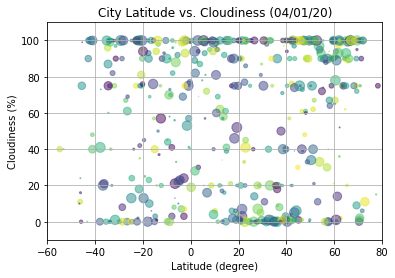

The above plot analyzes the relationship between Cloudiness in percentage and Latitude in degree.


In [113]:
# Latitude vs. Cloudiness Plot
N = 560
x = weather_df["Lat"]
y = weather_df["Cloudiness"]
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2  
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid()
plt.xlabel("Latitude (degree)")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlim(-60,80)
plt.ylim(-10,110)
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeCloudiness.png")
plt.show()
print("The above plot analyzes the relationship between Cloudiness in percentage and Latitude in degree.")

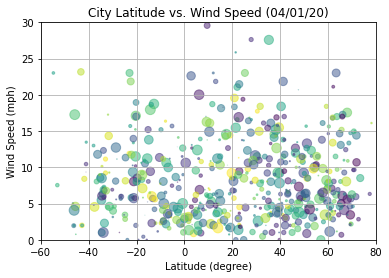

The above plot analyzes the relationship between Wind Speed in miles per hour and Latitude in degree.


In [120]:
# Latitude vs. Wind Speed Plot
N = 560
x = weather_df["Lat"]
y = weather_df["Wind Speed"]
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2  
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid()
plt.xlabel("Latitude (degree)")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlim(-60,80)
plt.ylim(0,30)
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeWindSpeed.png")
plt.show()
print("The above plot analyzes the relationship between Wind Speed in miles per hour and Latitude in degree.")

# Second requirement: linear regression on each relationship

In [121]:
# Subset weather_df into two datasets based on Latitude values (Lat>=0 and Lat<0)

NorthernHemisphere = weather_df[weather_df["Lat"]>=0]

SouthernHemisphere = weather_df[weather_df["Lat"]<0]


The coefficient of correlation is:-0.7309284443770161


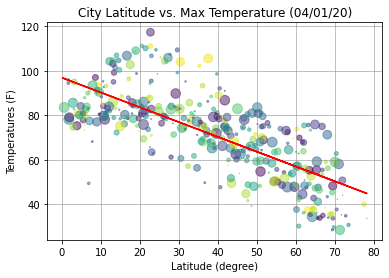

The Latitude is strongly and negatively correlated to the Temperature in the Northern Hemisphere.


In [127]:
# Create two arrays that represent Latitude and Temperature
x = NorthernHemisphere["Lat"]
y = NorthernHemisphere["Max Temp"]

# Define a model to calculate some important indicators
slope, intercept, r, p, std_err  = stats.linregress(x, y)

# define the regression function
def regression(x):
  return slope * x + intercept

linear_regression = list(map(regression, x))

# Size of the NorthernHemisphere dataset
N = 396

# Defining area and color for each point in the scatterplot
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2 

 # Scatterplot
plt.scatter(x, y,s=area, c=colors, alpha=0.5)

# x-axis title
plt.xlabel("Latitude (degree)")

#y-axis title
plt.ylabel("Temperatures (F)")

# Graph title
plt.title("City Latitude vs. Max Temperature (04/01/20)")

# Adding a customize grid 
plt.grid(color="gray", linestyle="-", linewidth=0.5)

# Drawing a customize line of regression  in the plot 
plt.plot(x, linear_regression, color="red")

# display r and the scatterplot 
print(f"The coefficient of correlation is:{r}")
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeTemperature_reg.png")
plt.show()

# Explanation of r
print("The Latitude is strongly and negatively correlated to the Temperature in the Northern Hemisphere.")